## MODELOS SUPERVISADOS: 
LogisticRegression, LinearSVC, MultinomialNB,  NeighborsClassifier y DecisionTreeClassifier

### 1. Cargar librerías

In [4]:
import re as re
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
import emoji as emoji
import csv
import pandas as pd
from pandas import DataFrame
import numpy as np
from nltk import TweetTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from Preprocessor import Preprocessor
import sklearn as sklearn
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

### 2. Base de Datos

#### 2.1 Importar datos 

In [5]:
import pandas as pd
train= pd.read_csv(r'C:\Users\jilli\Desktop\TFM\2\train.csv') #Ruta Jillie
train[1:2]

,Tweet_Id,Tweet_User_Id,Tweet_User,Text,Retweets,Favorites,Replies,Datetime,hashtags,Pais,Tweet_Source,lang,clean_text,clean_text2,Ind_emoji,clean_text3,Ind_Posi,Ind_Nega,Target,text_limpio
1,1243708742161633280,1113483741765222401,MJosealf,Pero que falta de criterio!!!! Y esto está pas...,0,0,0,2020-03-28 01:17:25+00:00,NaN,Chi,Twitter for iPhone,es,{'🤬': 'face with symbols on mouth'},Pero que falta de criterio!!!! Y esto está pas...,1,['face with symbols on mouth'],0,1,N,pero que falta de criterio y esto está pasando...


In [6]:
train["text_limpio"]=train["Text"].to_numpy() # duplica columna Text con formato numpy

#### 2.2 Preprocesamiento de datos

In [7]:
# definir funciones

def removeURLs(str):
    return re.sub(r'https?://\S+','',str)
def normURLs(str):
    return re.sub(r'https?://\S+','link',str)
def removeWWW(str):
    return re.sub(r'www.\S+','',str)
def normWWW(str):
    return re.sub(r'www.\S+','link',str)

def strip_emoji(text):
    new_text = re.sub(emoji.get_emoji_regexp(), r"", text)
    return new_text
def remove_user(str):
    return re.sub(r'@\S+','',str)
def norm_user(str):
    return re.sub(r'@\S+','usuario',str)
def remove_at(str):
    return re.sub(r'– at.+$','',str)
def remove_hashtags(str):
    return re.sub(r'#\S+','',str)
def norm_hashtags(str):
    return re.sub(r'#\S+','hashtag',str)
def punct_re_regex(s):     ##del profesor
    return re.sub(r'[^\w\s]','',s)    
def remove_digits(input_text):
    return re.sub('\d+', '', input_text)
def remove_spaces(text):   #remueve espacios
    return re.sub(r' +',' ',text)
def remove_cant_char(str):
    return re.sub(r'\b\w{1,2}\b','',str)
def aaaa(text):
    text = ''.join([c for c in text if c not in spanish_stopwords])
    return text
jergas = [('d','de'), ('[qk]','que'), ('xo','pero'),('fav','favorito'), ('xa', 'para'), ('[xp]q','porque'),('es[qk]', 'es que'),
              ('fvr','favor'),('(xfa|xf|pf|plis|pls|porfa)', 'por favor'), ('dnd','donde'), ('tb', 'también'),('ud','usted'),
             ('uds','ustedes'),('(ctm|alv|hdp)','insulto'), ('sr','señor'),('(fds|finde)','fin de semana'),('app','aplicación'),
         ('(La concha de tu madre|conchasumadres|reconchadesumadre|conchatumadre|la concha de la madre|la concha de su madre|La concha bien de su madre|la concha de tu hermana)','insulto'),
              ('(tq|tk)', 'te quiero'), ('(tqm|tkm)', 'te quiero mucho'),('bb','bebé'), ('x','por'), ('\+','mas')]
def normalize_jergas(message):
    for s,t in jergas:
        message = re.sub(r'\b{0}\b'.format(s), t, message, flags=re.IGNORECASE)
    return message   
vocales= [('á','a'), ('é','e'), ('í','i'), ('ó','o'), ('ú','u'), ('ü','u')]
def norma_vocales(message):
    for s,t in vocales:
        message = re.sub(r'{0}'.format(s), t, message, flags=re.IGNORECASE)
    return message
def normalize_risas(message):
        message = re.sub(r'\b(?=\w*[j])[aeiouj]{4,}\b', 'risas', message, flags=re.IGNORECASE)
        message = re.sub(r'\b(juas+|lol+)\b', 'risas', message, flags=re.IGNORECASE)
        message = re.sub(r'\b(ja|jaa)\b', 'risas', message, flags=re.IGNORECASE)
        return message
def normalize_repet(message):
        message = re.sub(r'(.)\1{2,}', r'\1\1', message, flags=re.IGNORECASE)
        return message

_stemmer = SnowballStemmer('spanish')
_tokenizer = TweetTokenizer().tokenize
    
def stem(message):
    message = ' '.join(_stemmer.stem(w) for w in _tokenizer(message))
    return message

In [8]:
# aplicar funciones

train['text_limpio']=train['text_limpio'].str.lower()   ## minúsculas
#train["text_limpio"]=train["text_limpio"].apply(lambda tweet: removeURLs(tweet)) ##quita url
train["text_limpio"]=train["text_limpio"].apply(lambda tweet: normURLs(tweet)) ##normaliza url
train["text_limpio"]=train["text_limpio"].apply(lambda tweet: normWWW(tweet)) ##normaliza url
train["text_limpio"]=train["text_limpio"].apply(lambda tweet: strip_emoji(tweet))  # quita emojis
#train["text_limpio"]=train["text_limpio"].apply(lambda tweet: remove_user(tweet))  #quita usuario
train["text_limpio"]=train["text_limpio"].apply(lambda tweet: norm_user(tweet))  #normaliza usuario
#train["text_limpio"]=train["text_limpio"].apply(lambda tweet: remove_hashtags(tweet))  #quita hashtags
train["text_limpio"]=train["text_limpio"].apply(lambda tweet: norm_hashtags(tweet))  #normalizar hashtags
train["text_limpio"]=train["text_limpio"].apply(lambda tweet: remove_at(tweet))  #quita at hasta el final
train["text_limpio"]=train["text_limpio"].apply(lambda tweet: normalize_jergas(tweet)) #normaliza jergas
train["text_limpio"]=train["text_limpio"].apply(lambda tweet: norma_vocales(tweet)) #normaliza tildes
train["text_limpio"]=train["text_limpio"].apply(lambda tweet: normalize_risas(tweet))   #normaliza risas
train["text_limpio"]=train["text_limpio"].apply(lambda tweet: punct_re_regex(tweet))  #quita signos punt
train["text_limpio"]=train["text_limpio"].apply(lambda tweet: normalize_repet(tweet))  #quita signos punt
train["text_limpio"]=train["text_limpio"].apply(lambda tweet: remove_digits(tweet))   #Quita dígitos
train['text_limpio']=train['text_limpio'].str.replace("_", "")     #quita _
train["text_limpio"]=train["text_limpio"].apply(lambda tweet: stem(tweet))
train["text_limpio"]=train["text_limpio"].apply(lambda tweet: remove_spaces(tweet))  
train['text_limpio']=train['text_limpio'].str.strip()


In [9]:
base_train=train.iloc[:,[0,19,18]] # alternativa para seleccionar columnas: emojis[["text_SINemoji","Target"]]

In [10]:
base_train

,Tweet_Id,text_limpio,Target
0,1249382391120048129,en esta cuarenten mi psicolog me ha dich que l...,N
1,1243708742161633280,per que falt de criteri y esto esta pas en muc...,N
2,1239277368986009600,graci lor aca todavi no es tan sever la cuaren...,P
3,1235980525694783488,cas confirm hashtag selv hashtag lim,N
4,1242148777357705216,yo si es que dig que usted aunqu no conozc a l...,P
...,...,...,...
22269,1285048010687291392,la pandemi me ha quit tant moment lind per has...,P
22270,1249688695256403969,grabat mientr vuel siempr y cuand no estes sol...,P
22271,1251896052279582721,lo buen de la cuarenten es que ya no hay que c...,P
22272,1276917451557568515,dia de cuarenten hashtag y much graci a usuari...,P


In [24]:
# convertir archivo a formato csv
base_train.to_csv('base_train.csv', header=False, index=False, encoding='utf-8-sig')

### 3. Modelo

In [11]:
# convertir de csv a list
def csv_to_lists(filename):
    messages = []
    labels = []
    with open(filename, 'r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            messages.append(row[1])
            labels.append(row[2])
    return messages, labels
# NOTA: ESTE CÓDIGO ES UNA ADAPTACIÓN DE CARLES,V (2018). ANÁLISIS DE SENTIMIENTOS EN TWITTER

In [26]:

# cargar datos
message, label = csv_to_lists("C:/Users/jilli/Desktop/TFM/2/base_train.csv")

# spanish stop words
spanish_stopwords = stopwords.words('spanish')

# metricas
scoring = {'accuracy': 'accuracy',
           'f1_weighted': 'f1_weighted',
          'roc_auc':'roc_auc',
         'precision_weighted': 'precision_weighted',
            'recall_weighted': 'recall_weighted'
            }
            
# pipeline
pipeline = Pipeline([('vectorizer', None),
                     ('classifier', None)])

# Tokenización
tokenizer = TweetTokenizer().tokenize

# feature weights
bow_binary_term_ocurrences = CountVectorizer(binary=True, tokenizer=tokenizer)
bow_tfidf = TfidfVectorizer(use_idf=True, tokenizer=tokenizer)

parameters = [{
    'vectorizer': (bow_binary_term_ocurrences, bow_tfidf),
    'vectorizer__preprocessor': (Preprocessor(twitter_features=Preprocessor.NORMALIZE).preprocess,
                                 Preprocessor(twitter_features=Preprocessor.NORMALIZE, stemming=True).preprocess),
    'vectorizer__stop_words': (None, spanish_stopwords),
    'classifier': (LogisticRegression(),LinearSVC(),MultinomialNB(),KNeighborsClassifier(n_neighbors=200),DecisionTreeClassifier())
}]


if __name__ == '__main__':
    skf = StratifiedKFold(n_splits=5, shuffle=True) # shufflebool, default=False. Whether to shuffle each class’s samples before splitting into batches. Note that the samples within each split will not be shuffled.
    grid_search = GridSearchCV(pipeline, param_grid=parameters, n_jobs=-1, cv=skf, verbose=5, scoring=scoring,
                               refit='f1_weighted', return_train_score=False)
    grid_search.fit(message, label)
    
    print("best_score:", grid_search.best_score_)
    pd.DataFrame(grid_search.cv_results_).to_csv(path_or_buf='baseline.csv',
                                                 quoting=csv.QUOTE_NONNUMERIC) # Se exportan resultados 'baseline.csv'
# NOTA: ESTE CÓDIGO ES UNA ADAPTACIÓN DE CARLES,V (2018). ANÁLISIS DE SENTIMIENTOS EN TWITTER

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 16.8min finished


best_score: 0.7157176995565704


C:\Users\jilli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# convertir a formato excel los resultados
a=pd.DataFrame(grid_search.cv_results_)
a
a.to_excel('Resul_AS_16NOV.xls', header=True, index=True, encoding='utf-8-sig')

### 4. Predicción

In [77]:
base_predict= pd.read_csv(r'C:\Users\jilli\Desktop\TFM\2\test.csv')  
base_predict  = DataFrame(base_predict,columns=["Tweet_Id", "Text","Datetime", "Pais","Target"])
base_predict

,Tweet_Id,Text,Datetime,Pais,Target
0,1241218096221827072,"Señoress en tiempos de pandemia, nada mejor qu...",2020-03-21 04:20:29+00:00,Col,P
1,1254624530674393088,¿Pero en cuarentena? 🤷,2020-04-27 04:12:52+00:00,Col,N
2,1260601329375940610,"Mi joystick...no alcanzará a llegar, gracias M...",2020-05-13 16:02:32+00:00,Chi,N
3,1268498533906292738,Hablemos de belleza en la cuarentena bogotana....,2020-06-04 11:03:12+00:00,Col,P
4,1252826196217262081,💙💙💙 #homeworkslave #BoyWithLuv #cuarentena vam...,2020-04-22 05:06:56+00:00,Per,P
...,...,...,...,...,...
9541,1273759524126588930,91 días de cuarentena y vamos récord tras réco...,2020-06-18 23:28:30+00:00,Arg,N
9542,1262147333250322432,NOS ANIMAMOS AL CORTE DE PELO. 😂 Muchísimas gr...,2020-05-17 22:25:48+00:00,Arg,P
9543,1252681613776949248,No doy más mabel quiero salir!!!!😒 #encierro #...,2020-04-21 19:32:25+00:00,Arg,N
9544,1251206243307393026,Vamos como avión 🤦‍♀️ #Covid_19,2020-04-17 17:49:49+00:00,Chi,N


In [78]:
base_predict["text_limpio"]=base_predict["Text"].to_numpy() # duplica columna Text con formato numpy
base_predict['text_limpio']=base_predict['text_limpio'].str.lower()   ## minúsculas
#base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: removeURLs(tweet)) ##quita url
base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: normURLs(tweet)) ##normaliz url
base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: normWWW(tweet)) ##normaliza url
base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: strip_emoji(tweet))  # quita emojis
#base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: remove_user(tweet))  #quita usuario
base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: norm_user(tweet))  #normaliza usuario
#base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: remove_hashtags(tweet))  #quita hashtags
base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: norm_hashtags(tweet))  #normaliza hashtags
base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: remove_at(tweet))  #quita at hasta el final
base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: normalize_jergas(tweet)) #normaliza jergas
base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: norma_vocales(tweet)) #normaliza tildes
base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: normalize_risas(tweet))   #normaliza risas
base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: punct_re_regex(tweet))  #quita signos punt
base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: normalize_repet(tweet))  #quita signos punt
base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: remove_digits(tweet))   #Quita dígitos
base_predict['text_limpio']=base_predict['text_limpio'].str.replace("_", "")     #quita _
base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: stem(tweet))
base_predict["text_limpio"]=base_predict["text_limpio"].apply(lambda tweet: remove_spaces(tweet))  
#Base_Emojis_PN["clean_text"]=Base_Emojis_PN["clean_text"].apply(lambda tweet: remove_cant_char(tweet))
base_predict['text_limpio']=base_predict['text_limpio'].str.strip()

In [79]:
text_limpio=base_predict["text_limpio"].values.tolist()
text_limpio[0:2]

['señoress en tiemp de pandemi nad mejor que pelicul que nos llen de esper y much amor hashtag hashtag',
 'per en cuarenten']

In [80]:
# sentimiento y probabilidad
sentimiento=grid_search.predict(text_limpio) # grid_search.best_estimator_.predict(a)
sentimiento[0:2]
puntaje=grid_search.predict_proba(text_limpio) # grid_search.best_estimator_.predict(a)
puntaje[:,1]

array([0.8446212 , 0.50970356, 0.51930801, ..., 0.76643885, 0.53716867,
       0.29778682])

In [81]:
# Se agrega variable prediccion a la base de datos
from pandas import DataFrame
base_predict["sentimiento"] = DataFrame(sentimiento,columns=['sentimiento'])
base_predict["puntaje"] = DataFrame(puntaje[:,1],columns=['puntaje'])
base_predict[0:2]

,Tweet_Id,Text,Datetime,Pais,Target,text_limpio,sentimiento,puntaje
0,1241218096221827072,"Señoress en tiempos de pandemia, nada mejor qu...",2020-03-21 04:20:29+00:00,Col,P,señoress en tiemp de pandemi nad mejor que pel...,P,0.844621
1,1254624530674393088,¿Pero en cuarentena? 🤷,2020-04-27 04:12:52+00:00,Col,N,per en cuarenten,P,0.509704


In [82]:
# dar formato a fecha
base_predict['Dateprueba'] = pd.to_datetime(base_predict['Datetime'], errors='coerce')
base_predict['Dateprueba'] = base_predict['Dateprueba'].dt.date
base_predict[0:2]

,Tweet_Id,Text,Datetime,Pais,Target,text_limpio,sentimiento,puntaje,Dateprueba
0,1241218096221827072,"Señoress en tiempos de pandemia, nada mejor qu...",2020-03-21 04:20:29+00:00,Col,P,señoress en tiemp de pandemi nad mejor que pel...,P,0.844621,2020-03-21
1,1254624530674393088,¿Pero en cuarentena? 🤷,2020-04-27 04:12:52+00:00,Col,N,per en cuarenten,P,0.509704,2020-04-27


In [83]:
# creación de variables de positividad cambiando el %
base_predict['Posi_60'] = base_predict['puntaje'].apply(lambda x: "P" if x>=0.60 else "N")
base_predict['Posi_70'] = base_predict['puntaje'].apply(lambda x: "P" if x>=0.70 else "N")
base_predict['Posi_80'] = base_predict['puntaje'].apply(lambda x: "P" if x>=0.80 else "N")

In [ ]:
#transformación de variable target P/N a númerica 1/0
base_predict['Target_num'] = base_predict['Target'].apply(lambda x: 1 if x=='P' else 0)

In [86]:
roc_auc = roc_auc_score(base_predict["Target_num"], base_predict["puntaje"])
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Curva ROC - AUC del modelo:
0.7912848113170484


In [53]:
#guardar resultados
base_predict.to_csv('base_Resultados_test.csv', header=True, index=False, encoding='utf-8-sig')

In [54]:
graf_roc = base_predict

In [55]:
graf_roc.head()

,Tweet_Id,Text,Datetime,Pais,Target,text_limpio,sentimiento,puntaje,Dateprueba,Posi_60,Posi_70,Posi_80,Target_num
0,1241218096221827072,"Señoress en tiempos de pandemia, nada mejor qu...",2020-03-21 04:20:29+00:00,Col,P,señoress en tiempos de pandemia nada mejor que...,P,0.844621,2020-03-21,P,P,P,1
1,1254624530674393088,¿Pero en cuarentena? 🤷,2020-04-27 04:12:52+00:00,Col,N,pero en cuarentena,P,0.544852,2020-04-27,N,N,N,0
2,1260601329375940610,"Mi joystick...no alcanzará a llegar, gracias M...",2020-05-13 16:02:32+00:00,Chi,N,mi joystickno alcanzara a llegar gracias minsa...,P,0.530525,2020-05-13,N,N,N,0
3,1268498533906292738,Hablemos de belleza en la cuarentena bogotana....,2020-06-04 11:03:12+00:00,Col,P,hablemos de belleza en la cuarentena bogotana ...,P,0.703875,2020-06-04,P,P,N,1
4,1252826196217262081,💙💙💙 #homeworkslave #BoyWithLuv #cuarentena vam...,2020-04-22 05:06:56+00:00,Per,P,hashtag hashtag hashtag vamos aguantar,P,0.808059,2020-04-22,P,P,P,1


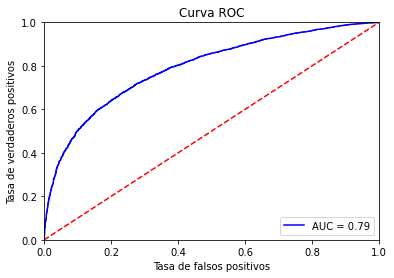

In [91]:
# gráfico ROC
fpr, tpr, threshold = metrics.roc_curve(graf_roc['Target_num'], graf_roc['puntaje'])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()

In [103]:
#metricas
print(sklearn.metrics.classification_report(base_predict['Target'], base_predict['sentimiento']))

              precision    recall  f1-score   support

           N       0.70      0.76      0.73      4755
           P       0.74      0.68      0.71      4791

    accuracy                           0.72      9546
   macro avg       0.72      0.72      0.72      9546
weighted avg       0.72      0.72      0.72      9546



In [102]:
#matriz de confusión
sklearn.metrics.confusion_matrix(base_predict['Target'], base_predict['sentimiento'])

array([[3611, 1144],
       [1531, 3260]], dtype=int64)